In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
rng = np.random.default_rng()

In [3]:
def make_meshgrid(x, y, n_steps=100, frac_ext=0.15):
    x_range = (x.max() - x.min())
    y_range = (y.max() - y.min())
    
    x_min, x_max = x.min() - x_range*frac_ext, x.max() + x_range*frac_ext
    y_min, y_max = y.min() - y_range*frac_ext, y.max() + y_range*frac_ext

    x_step = (x_max-x_min) / n_steps
    y_step = (y_max-y_min) / n_steps
    xx, yy = np.meshgrid(np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))
    return xx, yy

def plot_contours(ax, pred_func, xx, yy, region_colors=None):
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    regions = ax.contour(xx, yy, Z,levels=[0.5, 1.5], linewidths=1,
                        linestyles='solid', colors='black')
    out = ax.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5, 2.5], colors=region_colors, alpha=0.1)    #  cmap=cmap OR colors=['orange', 'green', 'blue']
    return out

def plot_decision_boundaries(X0, X1, int_labels, pred_func, type_strings=None, cmap='Set1', markers=None):
  # fig=plt.figure(figsize=(6,10), dpi=800, facecolor='w', edgecolor='k')
  # plt.rcParams['text.usetex'] = True
  
  
  # main_cmap = mpl.colormaps['Set1']
  # main_cmap.colors[0]
  cmap_obj = mpl.colormaps[cmap]
  # color_list = ['maroon', 'darkgreen', 'blue']
  color_list = list(cmap_obj.colors)
  color_list = color_list[0:len(np.unique(int_labels))]
  
  # Set-up grid for plotting.  
  xx, yy = make_meshgrid(X0, X1, n_steps=1000)

  sns.scatterplot(x=X0, y=X1, hue=int_labels, palette=(color_list), markers=markers)
  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')
  # ax.set_xticks(())
  # ax.set_yticks(())
  
  ax.legend()
  ax.set_xlim([xx.min(), xx.max()])
  ax.set_ylim([yy.min(), yy.max()])
  
  plot_contours(ax, pred_func, xx, yy, region_colors=color_list)
  
  ax.set_title('Decision Surface of a Linear Classifier')
  

In [4]:
def gen_gaussian_mixture(cov_mats, bias_vecs):
  num_dims = len(bias_vecs[0])
  # initialize data and labels with zero elements
  x_data = np.zeros((0,num_dims))
  y_data = np.zeros((0,))
  
  # generate samps_per_class data for each distribution
  for (cov,bias,label) in zip(cov_mats, bias_vecs, np.arange(len(bias_vecs))):
    new_xdata = rng.multivariate_normal(bias, cov, samps_per_class)
    new_ydata = label*np.ones((new_xdata.shape[0]))
    print(f"old shape = {x_data.shape}, new shape = {new_xdata.shape}")
    x_data = np.concatenate((x_data, new_xdata), axis=0)
    y_data = np.concatenate((y_data, new_ydata), axis=0)
  
  # Shuffle both arrays using the same permutation index
  permutation_index = np.random.permutation(len(y_data))
  x_data = x_data[permutation_index]
  y_data = y_data[permutation_index]
  return x_data, y_data

old shape = (0, 2), new shape = (500, 2)
old shape = (500, 2), new shape = (500, 2)


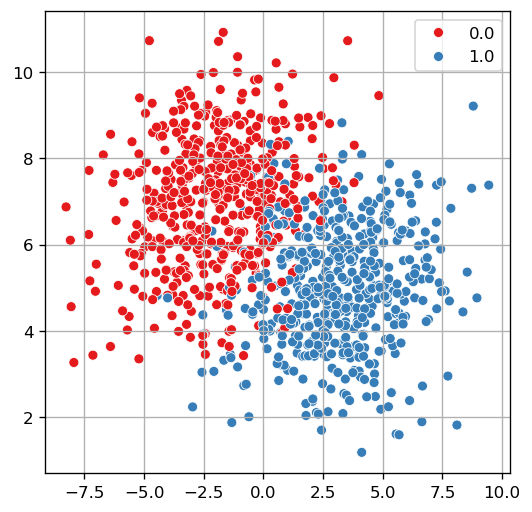

In [5]:
fig, ax = plt.subplots(figsize=(5,5), dpi=120, facecolor='w', edgecolor='k')

samps_per_class = 500

cov1 = [[5.0, +0.5],
       [+0.5, 2]]
bias1 = [-2.0, 7.0]

cov2 = [[5.0, +0.5],
       [+0.5, 2]]
bias2 = [+3.0, 5.0]

cov_mats = [cov1, cov2]
bias_vecs = [bias1, bias2]

x_data, y_data = gen_gaussian_mixture(cov_mats, bias_vecs)

sns.scatterplot(x=x_data[:,0], y=x_data[:,1], hue=y_data, ax=ax, palette='Set1')
# ax.set_xlim([-10, 10])
# ax.set_ylim([-10, 10])

ax.grid(True)


In [14]:
def lin_class_2d(feat_vec, wts=None, bias=None):

    if wts is None:
      wts = np.array([[+1.0, 1.0],
                      [ -1.0, -1.0]]
                     )
    if bias is None: 
      bias = np.array([0.0, 0.0])
      
    # if it is only a single feature vector, expand it into a 1-row, D-column matrix
    if len(feat_vec.shape) == 1:
        feat_vec = np.expand_dims(feat_vec, 0)
    # print(f"Before creating bias, input shape = {feat_vec.shape}")
    
    bias = np.tile(bias, [feat_vec.shape[0],1])
    
    yy = feat_vec @ wts.T
    yy += bias
    return np.argmax(yy, axis=1)

Classifier gives 48.30%


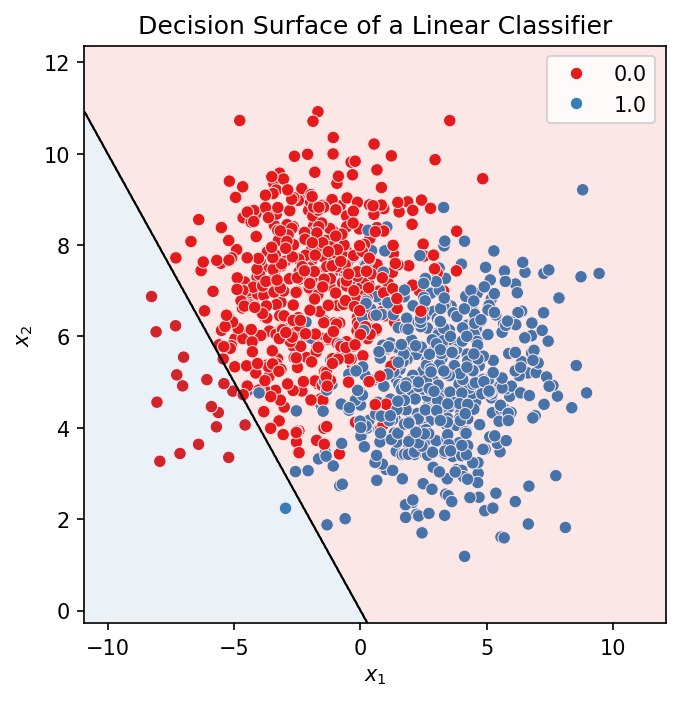

In [15]:
fig, ax = plt.subplots(figsize=(5,5), dpi=150, facecolor='w', edgecolor='k')

y_pred = lin_class_2d(x_data)

plot_decision_boundaries(x_data[:,0], x_data[:,1], y_data, lin_class_2d)

acc = np.sum(y_pred==y_data)/len(y_data)
print(f"Classifier gives {acc*100:4.2f}%")

Classifier gives 92.70%


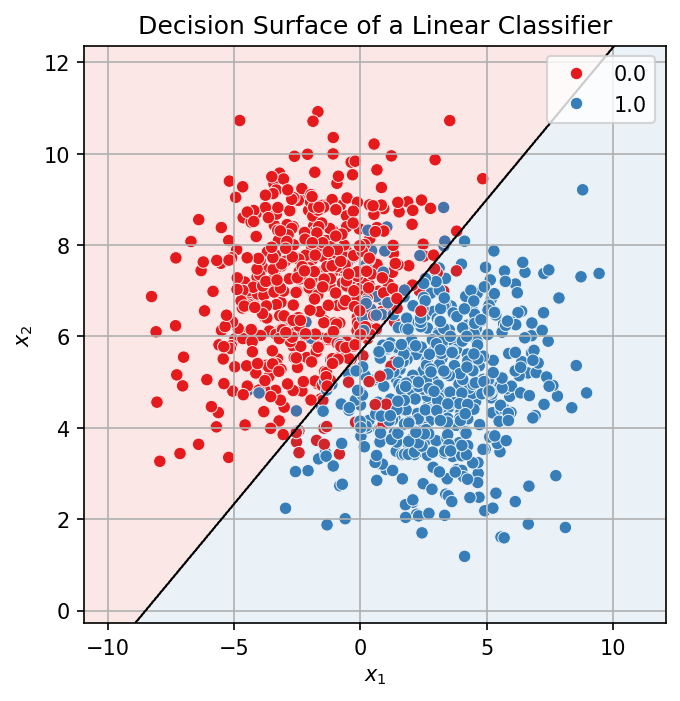

In [19]:
fig, ax = plt.subplots(figsize=(5,5), dpi=150, facecolor='w', edgecolor='k')

# Slope is ok, but bias is off
wts = np.array([[-1.0, +1.0],
                [ +1.0, -1.0]]
               )
bias = np.array([0.0, 0.0])
wts = np.array([[-1.0, +1.0],
                [ +1.0, -1.0]]
               )
bias = np.array([0.0, 17.0])
# these work pretty well
wts = np.array([[-1.0, +1.0],
                [ +1.0, -2.0]]
               )
bias = np.array([0.0, 17.0])

y_pred = lin_class_2d(x_data, wts=wts, bias=bias)
pred_func = lambda features : lin_class_2d(features, wts=wts, bias=bias)

plot_decision_boundaries(x_data[:,0], x_data[:,1], y_data, pred_func)
plt.grid(True)
acc = np.sum(y_pred==y_data)/len(y_data)
print(f"Classifier gives {acc*100:4.2f}%")

## 3-Class Problem

old shape = (0, 2), new shape = (500, 2)
old shape = (500, 2), new shape = (500, 2)
old shape = (1000, 2), new shape = (500, 2)


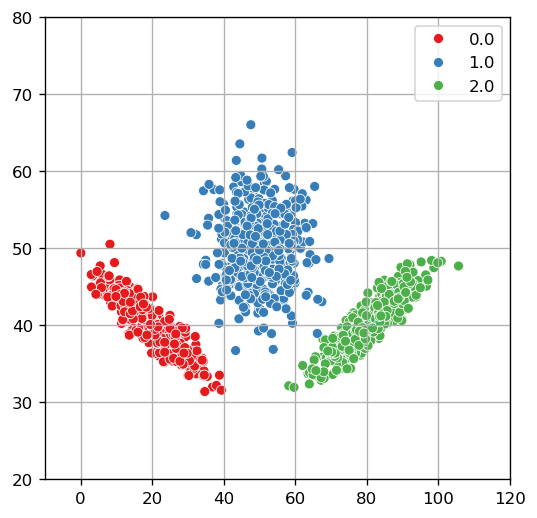

In [9]:
fig, ax = plt.subplots(figsize=(5,5), dpi=120, facecolor='w', edgecolor='k')

samps_per_class = 500

cov_mats = [[[50.0, -20.0],
             [-20.0, 10.0]],
            [[50.0, +0.0],
             [+0.0, 20.0]],
            [[50.0, +20.0],
             [+20.0, 10.0]],
           ]

bias_vecs = [[20.0, 40.0],
             [+50.0, 50.0],
             [+80.0, 40.0]
            ]

x_data2, y_data2 = gen_gaussian_mixture(cov_mats, bias_vecs)

sns.scatterplot(x=x_data2[:,0], y=x_data2[:,1], hue=y_data2, ax=ax, palette='Set1')
ax.set_xlim([-10, 120])
ax.set_ylim([20, 80])

ax.grid(True)

Classifier gives 99.73%


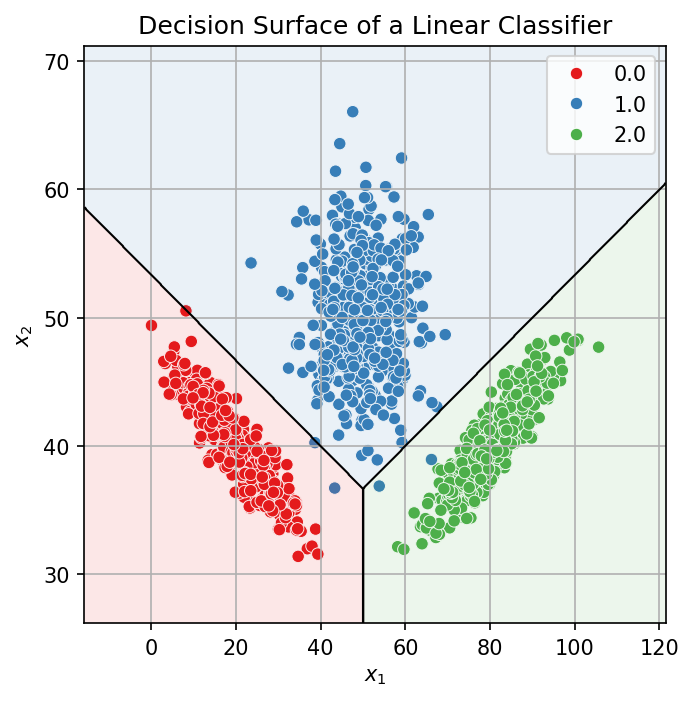

In [24]:
fig, ax = plt.subplots(figsize=(5,5), dpi=150, facecolor='w', edgecolor='k')

# First guess for 3-class weights
# cls_wts2 = np.array([[-1.0, -1.0],
#                      [ +0.0, -2.0],
#                      [+1.0, -1.0]
#                      ]
#                     )
# cls_bias2 = np.array([0.0, 0.0, 0.0])

## 2nd attempt at 3-class weights
cls_wts2 = np.array([[-1.0, -1.0],
                     [ +0.0, +2.0],
                     [+1.0, -1.0]
                     ]
                    )
cls_bias2 = np.array([100.0, -50.0, 0.0])

# close to optimal
cls_wts2 = np.array([[-1.0, -1.0],
                     [ +0.0, +2.0],
                     [+1.0, -1.0]
                     ])
cls_bias2 = np.array([100.0, -60.0, 0.0])


y_pred2 = lin_class_2d(x_data2, wts=cls_wts2, bias=cls_bias2)
pred_func = lambda features : lin_class_2d(features, wts=cls_wts2, bias=cls_bias2)



plot_decision_boundaries(x_data2[:,0], x_data2[:,1], y_data2, pred_func) #, markers=y_pred2)
plt.grid(True)
acc = np.sum(y_pred2==y_data2)/len(y_data2)
print(f"Classifier gives {acc*100:4.2f}%")